<a href="https://colab.research.google.com/github/alim98/MPI/blob/main/Statistical_Analyze_ViTMAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import plotly.express as px

saved_csv_path = 'synapse_features_umap_3d.csv'
visualization_df = pd.read_csv(saved_csv_path)
print("Generating interactive 3D Plotly scatter plot...")
fig = px.scatter(
    visualization_df,
    x='UMAP_2',
    y='UMAP_3',
    color='BoundingBox',
    title='2D UMAP Visualization of Synapse Features',
    labels={
        'UMAP_3': 'UMAP Component 1',
        'UMAP_2': 'UMAP Component 3',
        'BoundingBox': 'Bounding Box'
    },
    hover_data=['Var1'],
    color_discrete_sequence=px.colors.qualitative.Dark24,
    opacity=0.7
)
fig.update_traces(marker=dict(size=7))

fig.update_layout(
    legend_title_text='Bounding Box',
    template='plotly_white',
    width=1000,
    height=800
)

fig.update_layout(
    scene=dict(
        camera=dict(
            eye=dict(x=0, y=0)
        )
    )
)

fig.show()

output_html_path = 'synapse_umap_visualization_umap2d.html'
fig.write_html(output_html_path)
print(f"Plotly figure saved to '{output_html_path}'.")


Generating interactive 3D Plotly scatter plot...


Plotly figure saved to 'synapse_umap_visualization_umap2d.html'.


In [30]:
visualization_df.head()

,UMAP_1,UMAP_2,UMAP_3,BoundingBox
0,12.224996,-1.508706,17.565275,bbox1
1,13.835817,0.585413,16.254341,bbox1
2,13.653073,0.695872,16.290989,bbox1
3,13.931931,-0.030102,17.530365,bbox1
4,11.981413,0.913439,17.273426,bbox1


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the saved CSV file
saved_csv_path = '/content/synapse_features_umap_3d.csv'
df = pd.read_csv(saved_csv_path)


In [43]:
df.drop('Var1',axis=1)

,UMAP_1,UMAP_2,UMAP_3,BoundingBox
0,12.224996,-1.508706,17.565275,bbox1
1,13.835817,0.585413,16.254341,bbox1
2,13.653073,0.695872,16.290989,bbox1
3,13.931931,-0.030102,17.530365,bbox1
4,11.981413,0.913439,17.273426,bbox1
...,...,...,...,...
439,12.824162,-1.339907,18.381664,bbox6
440,13.729594,-1.374379,18.364023,bbox6
441,13.616239,-1.629555,18.311237,bbox6
442,11.470026,-1.105242,19.060965,bbox6


In [37]:
!pip install pyemd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 7.4 MB/s eta 0:00:00


Basic Statistics:
           UMAP_1      UMAP_2      UMAP_3          PCA1          PCA2
count  600.000000  600.000000  600.000000  6.000000e+02  6.000000e+02
mean    12.741781   -0.472038   18.198531  1.243450e-15  2.954674e-15
std      1.168342    0.613338    1.025278  1.250614e+00  9.741104e-01
min      9.234606   -2.548128   15.847190 -3.506816e+00 -3.070338e+00
25%     11.954186   -0.847719   17.424770 -8.843404e-01 -6.535317e-01
50%     12.752669   -0.403458   18.060943 -6.699630e-02 -2.343606e-02
75%     13.532137   -0.029836   18.871003  8.813148e-01  6.103552e-01
max     17.038005    0.886680   21.145301  4.212482e+00  3.048927e+00


Missing Values in UMAP Features:
UMAP_1    0
UMAP_2    0
UMAP_3    0
dtype: int64




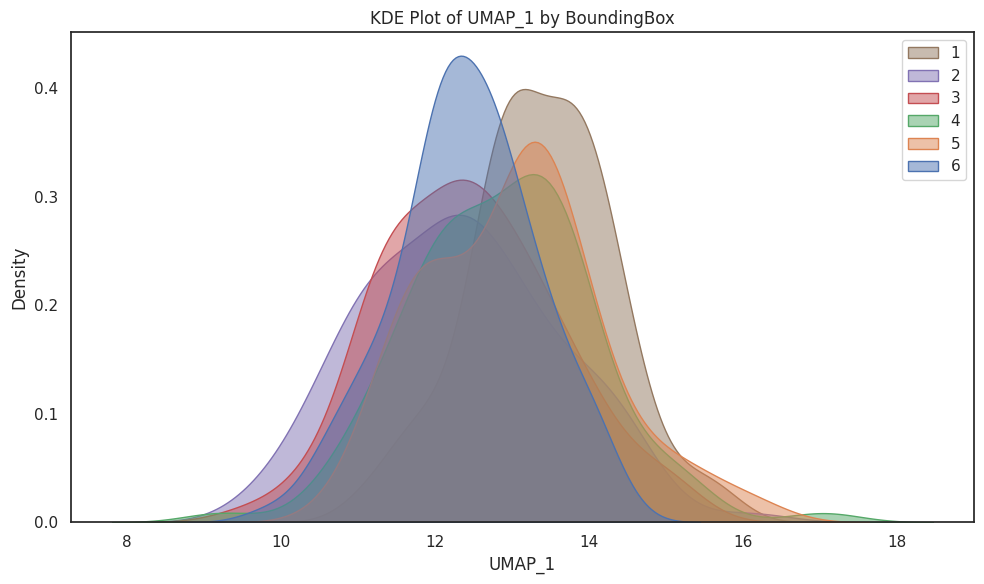

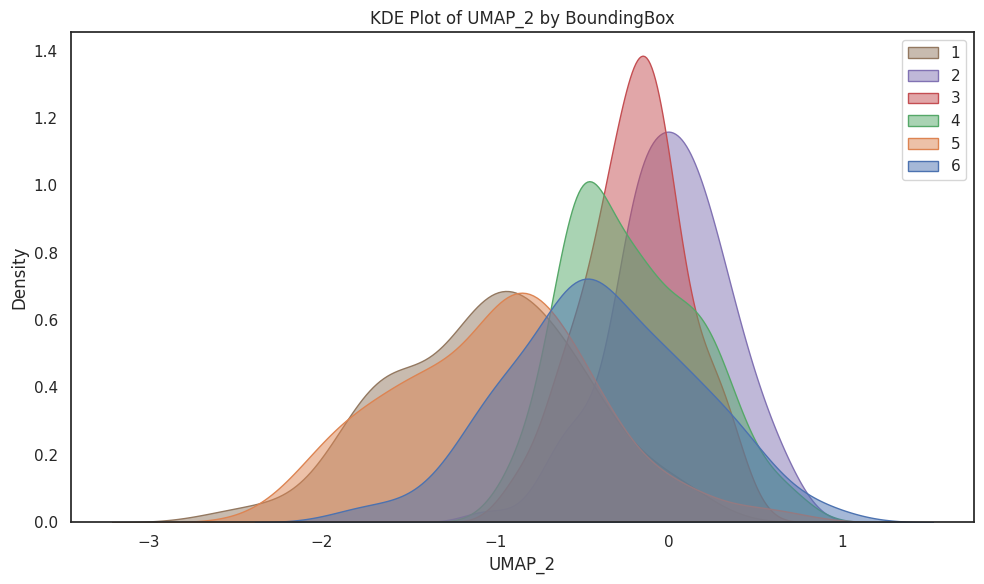

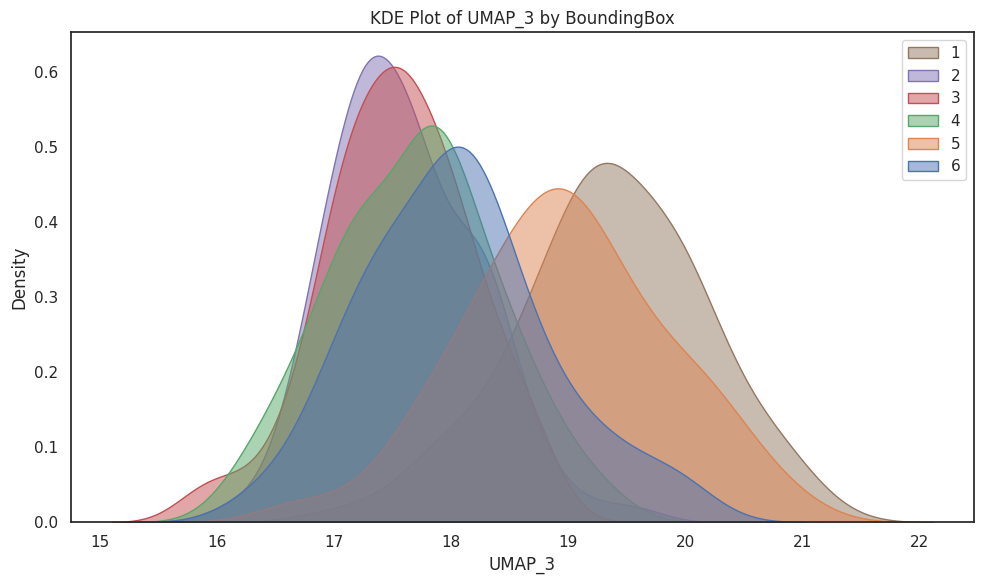

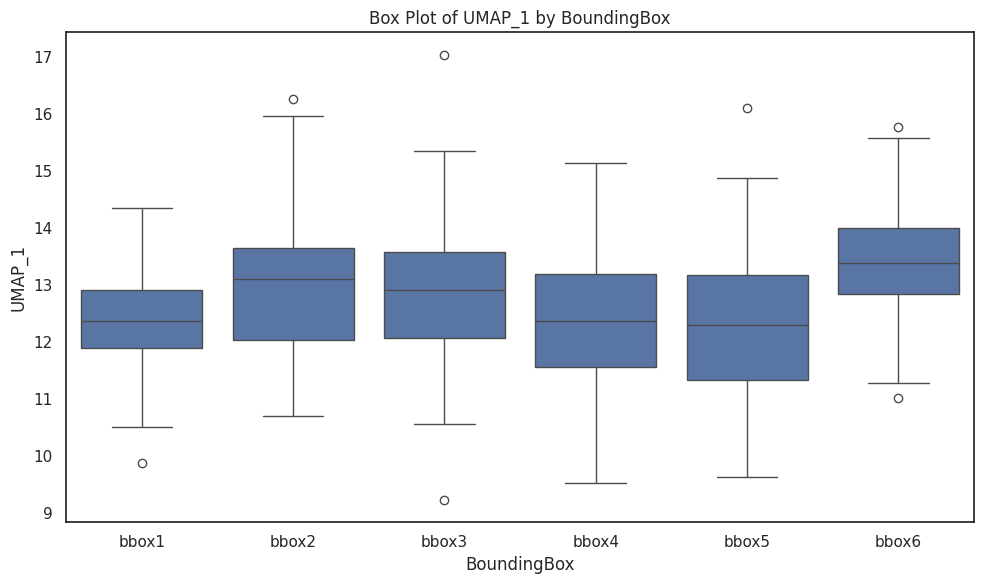

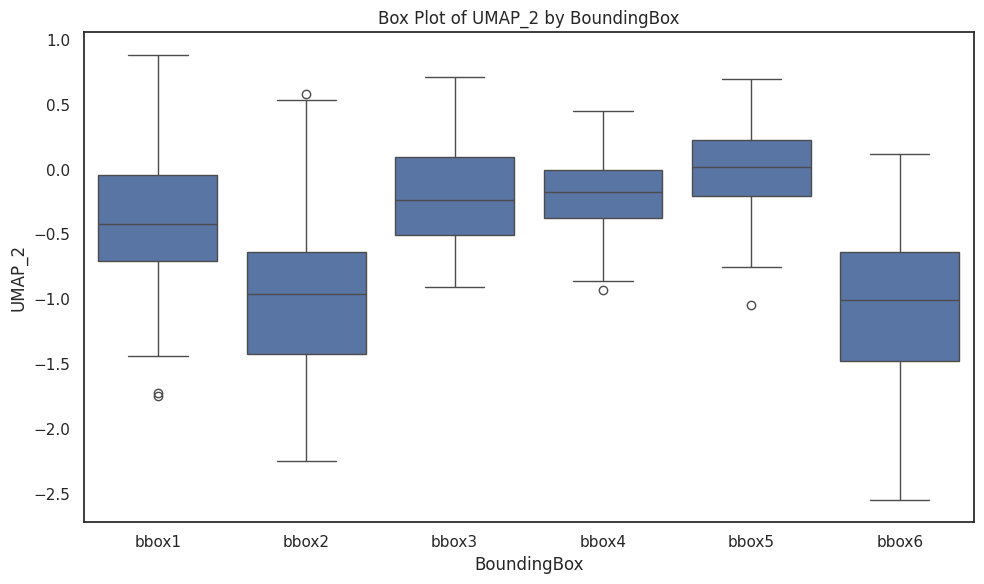

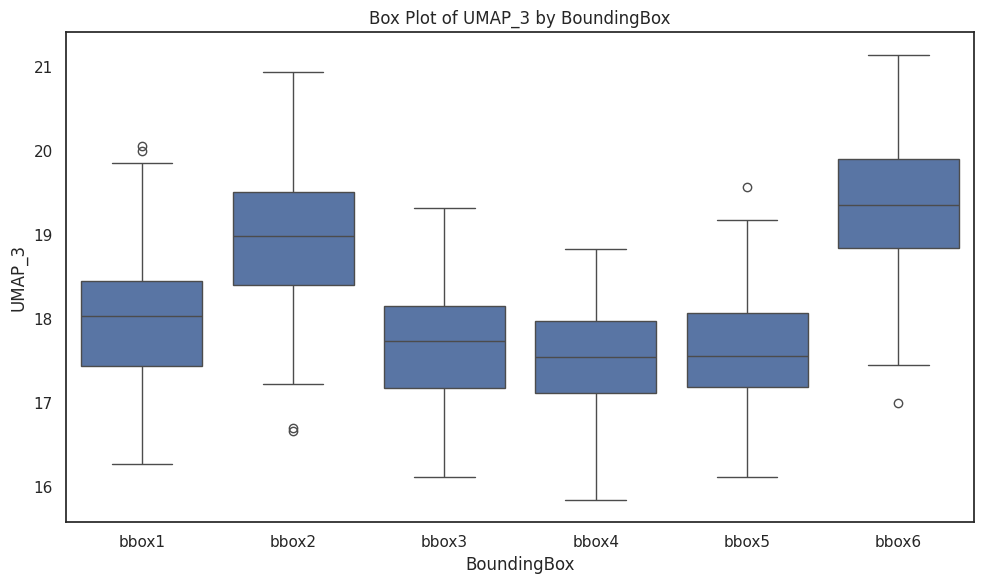

Mean UMAP Features per BoundingBox:
                UMAP_1    UMAP_2     UMAP_3
BoundingBox                                
bbox1        12.396153 -0.387953  18.036525
bbox2        13.026766 -1.003696  18.968584
bbox3        12.871386 -0.208540  17.685085
bbox4        12.438892 -0.191644  17.540512
bbox5        12.332795  0.006061  17.607229
bbox6        13.384694 -1.046454  19.353251


Euclidean Distance Matrix Between BoundingBoxes:
BoundingBox     bbox1     bbox2     bbox3     bbox4     bbox5     bbox6
BoundingBox                                                            
bbox1        0.000000  1.282788  0.617693  0.535157  0.586137  1.773303
bbox2        1.282788  0.000000  1.517822  1.744825  1.831527  0.527172
bbox3        0.617693  1.517822  0.000000  0.456331  0.584975  1.936069
bbox4        0.535157  1.744825  0.456331  0.000000  0.234083  2.216138
bbox5        0.586137  1.831527  0.584975  0.234083  0.000000  2.294096
bbox6        1.773303  0.527172  1.936069  2.216138  2.29

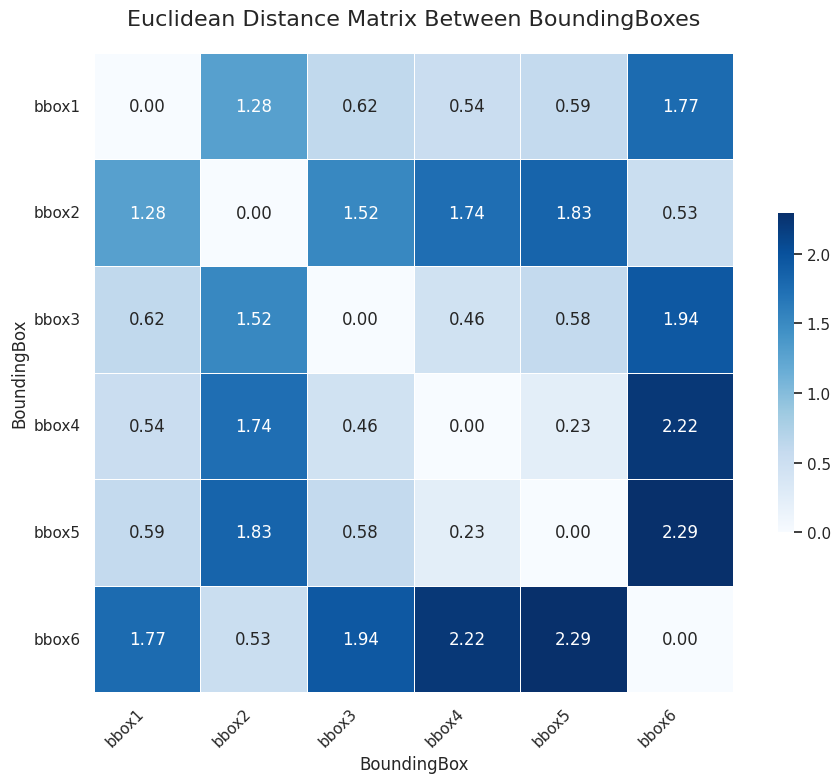

In [62]:
# Import Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import pdist, squareform
from scipy import stats
import numpy as np


df['BoundingBox'] = df['BoundingBox'].astype('category')

# 2. Exploratory Data Analysis (EDA)

print("Basic Statistics:")
print(df.describe())
print("\n")

# Check for missing values
print("Missing Values in UMAP Features:")
print(df[['UMAP_1', 'UMAP_2', 'UMAP_3']].isnull().sum())
print("\n")

# 3. Visualize UMAP Feature Distributions

# 3.a. Kernel Density Estimation (KDE) Plots
for feature in ['UMAP_1', 'UMAP_2', 'UMAP_3']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='BoundingBox', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'KDE Plot of {feature} by BoundingBox')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend('123456')
    plt.tight_layout()
    plt.show()

# 3.b. Box Plots
for feature in ['UMAP_1', 'UMAP_2', 'UMAP_3']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='BoundingBox', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by BoundingBox')
    plt.xlabel('BoundingBox')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# 4. Compute Pairwise Similarity Measures Between Bounding Boxes

# 4.a. Euclidean Distance Matrix
# Compute pairwise Euclidean distances between bounding box means
bbox_means = df.groupby('BoundingBox', observed=True)[['UMAP_1', 'UMAP_2', 'UMAP_3']].mean()
print("Mean UMAP Features per BoundingBox:")
print(bbox_means)
print("\n")

euclidean_dist = pdist(bbox_means.values, metric='euclidean')
euclidean_dist_matrix = pd.DataFrame(
    squareform(euclidean_dist),
    index=bbox_means.index,
    columns=bbox_means.index
)

print("Euclidean Distance Matrix Between BoundingBoxes:")
print(euclidean_dist_matrix)
print("\n")

cosine_sim = cosine_similarity(bbox_means.values)
cosine_sim_matrix = pd.DataFrame(
    cosine_sim,
    index=bbox_means.index,
    columns=bbox_means.index
)

print("Cosine Similarity Matrix Between BoundingBoxes:")
print(cosine_sim_matrix)
print("\n")

# -------------------------------------------------
# 5. Visualize the Similarity and Distance Matrices
# -------------------------------------------------

# Set the style for seaborn
sns.set(style="white")

# 5.a. Visualize Euclidean Distance Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    euclidean_dist_matrix,
    annot=True,
    fmt=".2f",
    cmap='Blues',
    linewidths=.5,
    square=True,
    cbar_kws={"shrink": .5},
    annot_kws={"size": 12}
)
plt.title('Euclidean Distance Matrix Between BoundingBoxes', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import numpy as np

df['BoundingBox'] = df['BoundingBox'].astype('category')

# -------------------------------------------------
# 2. Verify the Data
# -------------------------------------------------

# Check unique BoundingBoxes
print("Unique BoundingBoxes:", df['BoundingBox'].unique())
print(f"Number of unique BoundingBoxes: {df['BoundingBox'].nunique()}\n")

# Check for missing values
print("Missing Values in UMAP Features:")
print(df[['UMAP_1', 'UMAP_2', 'UMAP_3']].isnull().sum())
print("\n")

# -------------------------------------------------
# 3. Perform ANOVA Tests
# -------------------------------------------------

# Define the features to test
features = ['UMAP_1', 'UMAP_2', 'UMAP_3']

# Initialize a list to store ANOVA results
anova_results = []

print("ANOVA Results:")
for feature in features:
    # Group the data by 'BoundingBox' and extract the feature values
    groups = [group[feature].values for name, group in df.groupby('BoundingBox')]

    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)

    # Store the results
    anova_results.append({
        'Feature': feature,
        'F-Statistic': f_stat,
        'p-Value': p_val
    })

    print(f'ANOVA for {feature}: F-statistic={f_stat:.2f}, p-value={p_val:.4f}')

anova_df = pd.DataFrame(anova_results)

# -------------------------------------------------
# 4. Perform PCA and Visualize with Plotly
# -------------------------------------------------

pca = PCA(n_components=2)

pca_result = pca.fit_transform(df[features])

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Optional: Display explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by PCA Components: {explained_variance}')

# color_palette = px.colors.qualitative.HSV  # Using HSV palette for distinct colors

# Create the interactive scatter plot
fig = px.scatter(
    df,
    x='PCA1',
    y='PCA2',
    color='BoundingBox',
    title='PCA of UMAP Features by BoundingBox',
    labels={
        'PCA1': f'PCA Component 1 ({explained_variance[0]*100:.1f}%)',
        'PCA2': f'PCA Component 2 ({explained_variance[1]*100:.1f}%)'
    },
    hover_data=features,  # Display original UMAP features on hover
)

# Update layout for better aesthetics
fig.update_layout(
    legend_title_text='BoundingBox',
    title_font_size=20,
    legend_font_size=14,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    plot_bgcolor='white'
)

# Show the plot
fig.show()

output_html_path = 'synapse_umap_visualization_pca.html'
fig.write_html(output_html_path)
print(f"Plotly figure saved to '{output_html_path}'.")


# Create a bar chart for F-Statistics
fig_f = go.Figure(data=[
    go.Bar(
        name='F-Statistic',
        x=anova_df['Feature'],
        y=anova_df['F-Statistic'],
        marker_color='indianred'
    )
])

fig_f.update_layout(
    title='ANOVA F-Statistics by Feature',
    xaxis_title='Feature',
    yaxis_title='F-Statistic',
    bargap=0.2,
    plot_bgcolor='white'
)

fig_f.show()

# Create a bar chart for p-Values
fig_p = go.Figure(data=[
    go.Bar(
        name='p-Value',
        x=anova_df['Feature'],
        y=anova_df['p-Value'],
        marker_color='lightsalmon'
    )
])

fig_p.update_layout(
    title='ANOVA p-Values by Feature',
    xaxis_title='Feature',
    yaxis_title='p-Value',
    bargap=0.2,
    plot_bgcolor='white'
)

fig_p.show()


Unique BoundingBoxes: ['bbox1', 'bbox2', 'bbox3', 'bbox4', 'bbox5', 'bbox6']
Categories (6, object): ['bbox1', 'bbox2', 'bbox3', 'bbox4', 'bbox5', 'bbox6']
Number of unique BoundingBoxes: 6

Missing Values in UMAP Features:
UMAP_1    0
UMAP_2    0
UMAP_3    0
dtype: int64


ANOVA Results:
ANOVA for UMAP_1: F-statistic=14.51, p-value=0.0000
ANOVA for UMAP_2: F-statistic=94.16, p-value=0.0000
ANOVA for UMAP_3: F-statistic=108.03, p-value=0.0000
Explained Variance by PCA Components: [0.56010435 0.33981194]


<ipython-input-63-c43daf93ffdc>:38: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Plotly figure saved to 'synapse_umap_visualization_pca.html'.
